In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from pyomo.environ import Constraint, SolverFactory, value, Param
from pyomo.network import Arc

from HDA_Sensitive import HDA_Flowsheet
from Method import (print_outcome, 
                   stream_report, 
                   stream_information, 
                   vessel_info,
                   heater_info,
                   cost_vessel, 
                   cost_fired_heater)

2024-04-29 13:08:40.552786: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


# F101 Temperature

In [3]:
F101_T = np.linspace(300,350,11)
UC_F101_T = []
Prod_F101_T = []
for T in F101_T:
    print(f'Solving {len(UC_F101_T)+1} times...')
    m = HDA_Flowsheet(F101_T=T)
    # 模型求解
    solver = SolverFactory('ipopt')
    solver.options['max_iter'] = 10000
    solver.options['tol'] = 1e-4
    results = solver.solve(m)
    UC_F101_T.append(value(m.Unit_cost))
    Prod_F101_T.append(value(m.production/8000))
    print('- Solve done.')
#m.F101.Vap_Outlet.T.setlb(300.0)
#m.F101.Vap_Outlet.T.setub(350.0)

Solving 1 times...
[2024-04-29 13:08:52] Inlet_Feed Block is created successfully!
[2024-04-29 13:08:52] R101 Block is created successfully!
[2024-04-29 13:08:52] H101 Block is created successfully!
[2024-04-29 13:08:52] F101 Block is created successfully!
[2024-04-29 13:08:52] F102 Block is created successfully!
[2024-04-29 13:08:52] M101 Block is created successfully!
[2024-04-29 13:08:52] S101 Block is created successfully!
[2024-04-29 13:08:52] Outlet_Flow Block is created successfully!

Units list: ['Inlet_Feed', 'R101', 'H101', 'F101', 'F102', 'M101', 'S101', 'Outlet_Flow']
model.name="F101";
    - termination condition: infeasible
    - message from solver: Ipopt 3.13.2\x3a Converged to a locally infeasible
      point. Problem may be infeasible.
- Solve done.
Solving 2 times...
[2024-04-29 13:08:54] Inlet_Feed Block is created successfully!
[2024-04-29 13:08:54] R101 Block is created successfully!
[2024-04-29 13:08:54] H101 Block is created successfully!
[2024-04-29 13:08:54] F

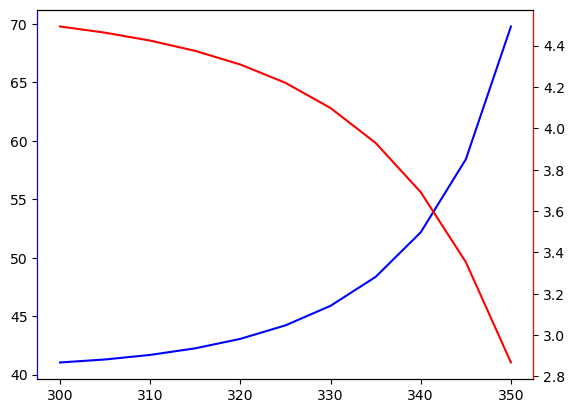

In [4]:
fig, ax = plt.subplots()
ax.plot(F101_T,UC_F101_T,color='b')
ax2 = ax.twinx()
ax2.plot(F101_T,Prod_F101_T,color='r')
ax2.spines['right'].set_color('red')
ax2.spines['left'].set_color('blue')
#ax2.set_ylim([0,5])

In [5]:
R101_T = np.linspace(550,900,11)
UC_R101_T = []
Prod_R101_T = []
for T in R101_T:
    print(f'Solving {len(UC_R101_T)+1} times...')
    m = HDA_Flowsheet(R101_T=T)
    #if T>450+273.15:
    #    m.R101.temperature_factor = 2.1
    # 模型求解
    solver = SolverFactory('ipopt')
    solver.options['max_iter'] = 10000
    solver.options['tol'] = 1e-4
    results = solver.solve(m)
    UC_R101_T.append(value(m.Unit_cost))
    Prod_R101_T.append(value(m.production/8000))
    print('- Solve done.')

Solving 1 times...
[2024-04-29 13:09:17] Inlet_Feed Block is created successfully!
[2024-04-29 13:09:17] R101 Block is created successfully!
[2024-04-29 13:09:17] H101 Block is created successfully!
[2024-04-29 13:09:17] F101 Block is created successfully!
[2024-04-29 13:09:17] F102 Block is created successfully!
[2024-04-29 13:09:17] M101 Block is created successfully!
[2024-04-29 13:09:17] S101 Block is created successfully!
[2024-04-29 13:09:17] Outlet_Flow Block is created successfully!

Units list: ['Inlet_Feed', 'R101', 'H101', 'F101', 'F102', 'M101', 'S101', 'Outlet_Flow']
model.name="F101";
    - termination condition: infeasible
    - message from solver: Ipopt 3.13.2\x3a Converged to a locally infeasible
      point. Problem may be infeasible.
- Solve done.
Solving 2 times...
[2024-04-29 13:09:19] Inlet_Feed Block is created successfully!
[2024-04-29 13:09:19] R101 Block is created successfully!
[2024-04-29 13:09:19] H101 Block is created successfully!
[2024-04-29 13:09:19] F

<bound method Spine.set_color of <matplotlib.spines.Spine object at 0x7fc261c48250>>

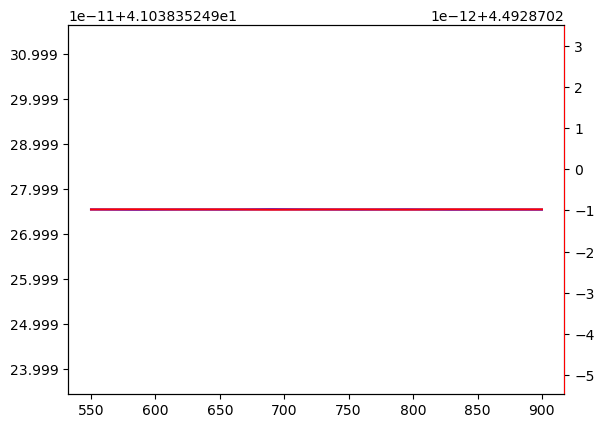

In [6]:
fig, ax = plt.subplots()
ax.plot(R101_T,UC_R101_T,color='b')
ax2 = ax.twinx()
ax2.plot(R101_T,Prod_R101_T,color='r')
ax2.spines['right'].set_color('red')
ax2.spines['left'].set_color


In [7]:
#F102_T = np.linspace(373,384,11)
F102_T = np.linspace(372.5,390,11)
UC_F102_T = []
Prod_F102_T = []
for T in F102_T:
    print(f'Solving T={T} times...')
    m = HDA_Flowsheet(F102_T=T)
    solver = SolverFactory('ipopt')
    solver.options['max_iter'] = 10000
    solver.options['tol'] = 1e-3
    results = solver.solve(m)
    
    UC_F102_T.append(value(m.Unit_cost))
    Prod_F102_T.append(value(m.production/8000))
    print('- Solve done.')

Solving T=372.5 times...
[2024-04-29 13:09:42] Inlet_Feed Block is created successfully!
[2024-04-29 13:09:42] R101 Block is created successfully!
[2024-04-29 13:09:42] H101 Block is created successfully!
[2024-04-29 13:09:42] F101 Block is created successfully!
[2024-04-29 13:09:42] F102 Block is created successfully!
[2024-04-29 13:09:42] M101 Block is created successfully!
[2024-04-29 13:09:42] S101 Block is created successfully!
[2024-04-29 13:09:42] Outlet_Flow Block is created successfully!

Units list: ['Inlet_Feed', 'R101', 'H101', 'F101', 'F102', 'M101', 'S101', 'Outlet_Flow']
model.name="F101";
    - termination condition: infeasible
    - message from solver: Ipopt 3.13.2\x3a Converged to a locally infeasible
      point. Problem may be infeasible.
- Solve done.
Solving T=374.25 times...
[2024-04-29 13:09:44] Inlet_Feed Block is created successfully!
[2024-04-29 13:09:44] R101 Block is created successfully!
[2024-04-29 13:09:44] H101 Block is created successfully!
[2024-04-2

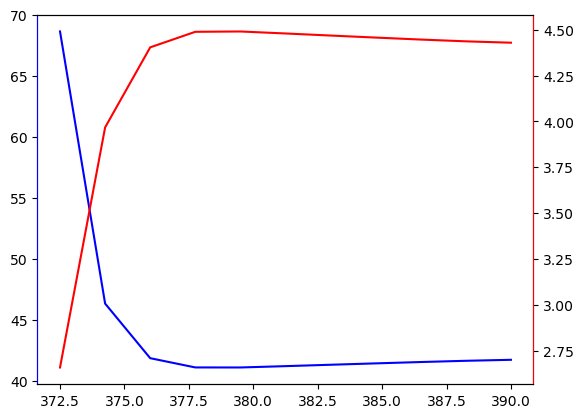

In [8]:
fig, ax = plt.subplots()
ax.plot(F102_T,UC_F102_T,color='b')
ax2 = ax.twinx()
ax2.plot(F102_T,Prod_F102_T,color='r')
ax2.spines['right'].set_color('red')
ax2.spines['left'].set_color('blue')


In [9]:
H101_T = np.linspace(500,800,11)
UC_H101_T = []
Prod_H101_T = []
for T in H101_T:
    print(f'Solving {len(UC_H101_T)+1} times...')
    m = HDA_Flowsheet(H101_T=T)
    solver = SolverFactory('ipopt')
    solver.options['max_iter'] = 10000
    solver.options['tol'] = 1e-4
    results = solver.solve(m)
    #production = m.F102.Vap_Outlet.flow["Vap", "benzene"] * 8000 * 3600 * 78 / 1e3
    UC_H101_T.append(value(m.Unit_cost))
    Prod_H101_T.append(value(m.production/8000)) # tonne/hr
    print('- Solve done.')

Solving 1 times...
[2024-04-29 13:10:07] Inlet_Feed Block is created successfully!
[2024-04-29 13:10:07] R101 Block is created successfully!
[2024-04-29 13:10:07] H101 Block is created successfully!
[2024-04-29 13:10:07] F101 Block is created successfully!
[2024-04-29 13:10:07] F102 Block is created successfully!
[2024-04-29 13:10:07] M101 Block is created successfully!
[2024-04-29 13:10:07] S101 Block is created successfully!
[2024-04-29 13:10:07] Outlet_Flow Block is created successfully!

Units list: ['Inlet_Feed', 'R101', 'H101', 'F101', 'F102', 'M101', 'S101', 'Outlet_Flow']
model.name="F101";
    - termination condition: infeasible
    - message from solver: Ipopt 3.13.2\x3a Converged to a locally infeasible
      point. Problem may be infeasible.
- Solve done.
Solving 2 times...
[2024-04-29 13:10:09] Inlet_Feed Block is created successfully!
[2024-04-29 13:10:09] R101 Block is created successfully!
[2024-04-29 13:10:09] H101 Block is created successfully!
[2024-04-29 13:10:09] F

(0.0, 9.0)

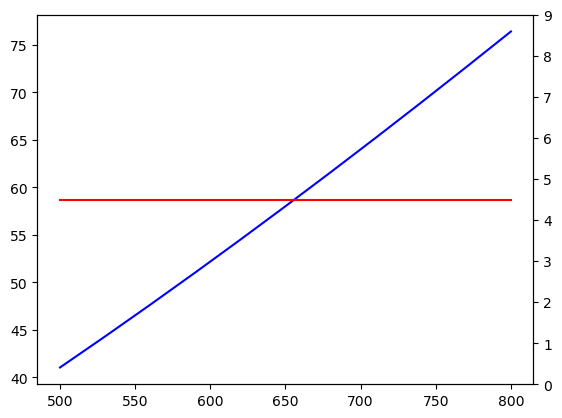

In [10]:
fig, ax = plt.subplots()
ax.plot(H101_T,UC_H101_T,color='b')
ax2 = ax.twinx()
ax2.plot(H101_T,Prod_H101_T,color='r')
ax2.set_ylim([0,9])

#plt.ylim([0,100])

In [11]:
F102_P = np.linspace(140000,160000,11)
UC_F102_P = []
Prod_F102_P = []
for P in F102_P:
    print(f'Solving {len(UC_F102_P)+1} times...')
    m = HDA_Flowsheet(F102_P=P)
    solver = SolverFactory('ipopt')
    solver.options['max_iter'] = 10000
    solver.options['tol'] = 1e-3
    results = solver.solve(m)
    UC_F102_P.append(value(m.Unit_cost))
    Prod_F102_P.append(value(m.production/8000))
    print('- Solve done.')

Solving 1 times...
[2024-04-29 13:10:32] Inlet_Feed Block is created successfully!
[2024-04-29 13:10:32] R101 Block is created successfully!
[2024-04-29 13:10:32] H101 Block is created successfully!
[2024-04-29 13:10:32] F101 Block is created successfully!
[2024-04-29 13:10:32] F102 Block is created successfully!
[2024-04-29 13:10:32] M101 Block is created successfully!
[2024-04-29 13:10:32] S101 Block is created successfully!
[2024-04-29 13:10:32] Outlet_Flow Block is created successfully!

Units list: ['Inlet_Feed', 'R101', 'H101', 'F101', 'F102', 'M101', 'S101', 'Outlet_Flow']
model.name="F101";
    - termination condition: infeasible
    - message from solver: Ipopt 3.13.2\x3a Converged to a locally infeasible
      point. Problem may be infeasible.
- Solve done.
Solving 2 times...
[2024-04-29 13:10:34] Inlet_Feed Block is created successfully!
[2024-04-29 13:10:34] R101 Block is created successfully!
[2024-04-29 13:10:34] H101 Block is created successfully!
[2024-04-29 13:10:34] F

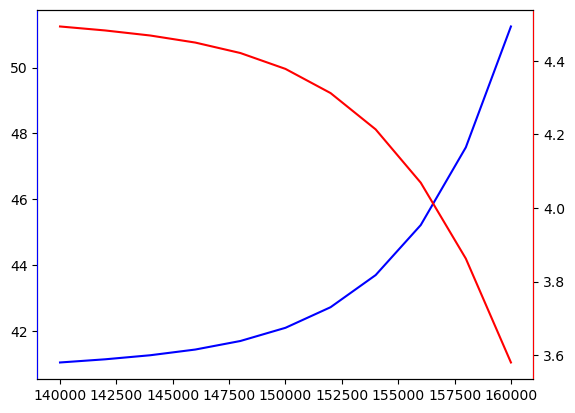

In [12]:
fig, ax = plt.subplots()
ax.plot(F102_P,UC_F102_P,color='b')
ax2 = ax.twinx()
ax2.plot(F102_P,Prod_F102_P,color='r')
ax2.spines['right'].set_color('red')
ax2.spines['left'].set_color('blue')


In [13]:
Total_Flow = np.linspace(0.05,0.15,11)
UC_Total_Flow = []
Prod_Total_Flow = []
for F in Total_Flow:
    print(f'Solving {len(UC_Total_Flow)+1} times...')
    m = HDA_Flowsheet(F=F)
    solver = SolverFactory('ipopt')
    solver.options['max_iter'] = 10000
    solver.options['tol'] = 1e-3
    results = solver.solve(m)
    UC_Total_Flow.append(value(m.Unit_cost))
    Prod_Total_Flow.append(value(m.production/8000))
    print('- Solve done.')


Solving 1 times...
[2024-04-29 13:10:55] Inlet_Feed Block is created successfully!
[2024-04-29 13:10:55] R101 Block is created successfully!
[2024-04-29 13:10:55] H101 Block is created successfully!
[2024-04-29 13:10:55] F101 Block is created successfully!
[2024-04-29 13:10:55] F102 Block is created successfully!
[2024-04-29 13:10:55] M101 Block is created successfully!
[2024-04-29 13:10:55] S101 Block is created successfully!
[2024-04-29 13:10:55] Outlet_Flow Block is created successfully!

Units list: ['Inlet_Feed', 'R101', 'H101', 'F101', 'F102', 'M101', 'S101', 'Outlet_Flow']
model.name="F101";
    - termination condition: infeasible
    - message from solver: Ipopt 3.13.2\x3a Converged to a locally infeasible
      point. Problem may be infeasible.
model.name="unknown";
    - termination condition: maxIterations
    - message from solver: Ipopt 3.13.2\x3a Maximum Number of Iterations
      Exceeded.
- Solve done.
Solving 2 times...
[2024-04-29 13:11:28] Inlet_Feed Block is created

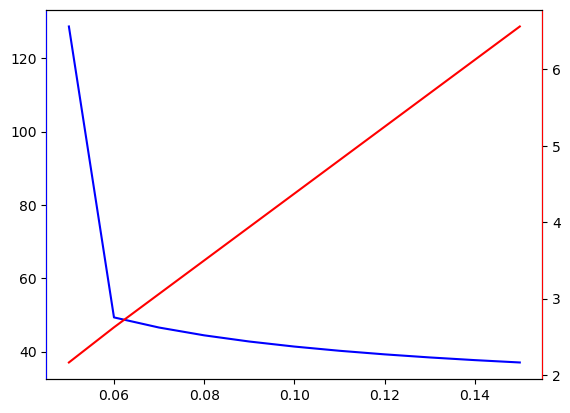

In [14]:
fig, ax = plt.subplots()
ax.plot(Total_Flow,UC_Total_Flow,color='b')
ax2 = ax.twinx()
ax2.plot(Total_Flow,Prod_Total_Flow,color='r')
ax2.spines['right'].set_color('red')
ax2.spines['left'].set_color('blue')


In [15]:
plt.rcParams['font.family']='Times New Roman'
def sens_plot(Interval, Unit_cost, Production):
    fig, ax_C = plt.subplots(figsize=(4, 3))
    ax_C.plot(Interval, Unit_cost, label='Cost', linestyle='-', marker='o',color='crimson',markersize=4)
    ax_C.set_ylabel('Cost ($/tonne)',weight='bold')
    ax_C.grid(False)
    ax_F=ax_C.twinx()
    ax_F.set_ylabel('Product (tonne/hr)',weight='bold')
    ax_F.plot(Interval, Production, label='Product', linestyle='--', marker='s',color='royalblue',markersize=4)
    return fig, ax_C, ax_F

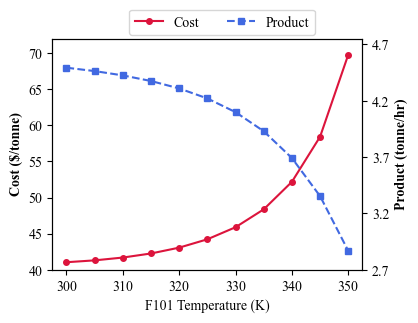

In [16]:
# F101 Temperature
fig, ax_C, ax_F = sens_plot(F101_T, UC_F101_T, Prod_F101_T)
ax_C.set_xlabel('F101 Temperature (K)')
ax_C.set_ylim([40,72])
#ax_C.set_yticks(np.arange(43,56,2))
ax_F.set_ylim([2.7,4.75])
ax_F.set_yticks(np.arange(2.7,4.75,0.5))
fig.legend(bbox_to_anchor=(0.3,1),loc=2,ncol=2)
#plt.savefig('./sens_fig/F101_Temperature.png',dpi=450,bbox_inches='tight')
plt.show()

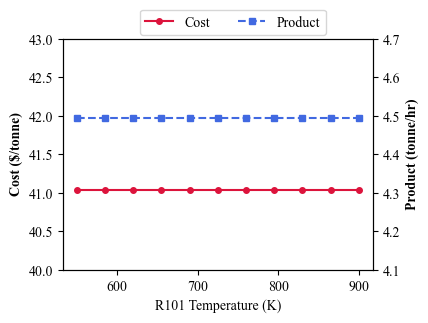

In [35]:
# R101 Temperature
fig, ax_C, ax_F = sens_plot(R101_T, UC_R101_T, Prod_R101_T)
ax_C.set_xlabel('R101 Temperature (K)')
ax_C.set_ylim([40,43])
#ax_C.set_yticks(np.arange(43,56,2))
ax_F.set_ylim([4.1,4.7])
#ax_F.set_yticks(np.arange(3.6,4.7,0.2))
fig.legend(bbox_to_anchor=(0.3,1),loc=2,ncol=2)
plt.savefig('./sens_fig/R101_Temperature.png',dpi=450,bbox_inches='tight')
plt.show()

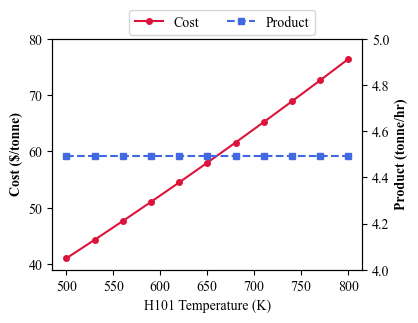

In [54]:
# H101 Temperature
fig, ax_C, ax_F = sens_plot(H101_T, UC_H101_T, Prod_H101_T)
ax_C.set_xlabel('H101 Temperature (K)')
ax_C.set_ylim([39,80])
#ax_C.set_yticks(np.arange(43,56,2))
ax_F.set_ylim([4,5])
#ax_F.set_yticks(np.arange(3.6,4.7,0.2))
fig.legend(bbox_to_anchor=(0.3,1),loc=2,ncol=2)
plt.savefig('./sens_fig/H101_Temperature.png',dpi=450,bbox_inches='tight')
plt.show()

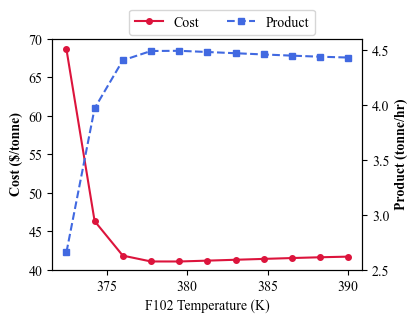

In [55]:
# F102 Temperature
fig, ax_C, ax_F = sens_plot(F102_T, UC_F102_T, Prod_F102_T)
ax_C.set_xlabel('F102 Temperature (K)')
ax_C.set_ylim([40,70])
#ax_C.set_yticks(np.arange(43,56,2))
ax_F.set_ylim([2.5,4.6])
#ax_F.set_yticks(np.arange(3.6,4.7,0.2))
fig.legend(bbox_to_anchor=(0.3,1),loc=2,ncol=2)
plt.savefig('./sens_fig/F102_Temperature.png',dpi=450,bbox_inches='tight')
plt.show()

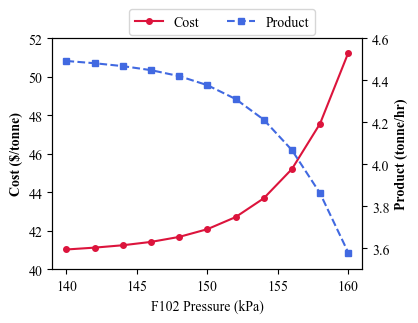

In [56]:
# F102 Pressure
fig, ax_C, ax_F = sens_plot(F102_P/1e3, UC_F102_P, Prod_F102_P)
ax_C.set_xlabel('F102 Pressure (kPa)')
ax_C.set_ylim([40,52])
ax_C.set_yticks(np.arange(40,52.1,2))
ax_F.set_ylim([3.5,4.6])
ax_F.set_yticks(np.arange(3.6,4.7,0.2))
fig.legend(bbox_to_anchor=(0.3,1),loc=2,ncol=2)
plt.savefig('./sens_fig/F102_Pressure.png',dpi=450,bbox_inches='tight')
plt.show()

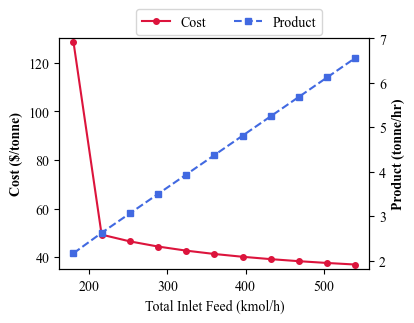

In [57]:
# Total Inlet Feed
fig, ax_C, ax_F = sens_plot(Total_Flow*3600, UC_Total_Flow, Prod_Total_Flow)
ax_C.set_xlabel('Total Inlet Feed (kmol/h)')
ax_C.set_ylim([35,130])
ax_F.set_ylim([1.8,7])
#ax_F.set_yticks(np.arange(2.5,7.1,1))
fig.legend(bbox_to_anchor=(0.3,1),loc=2,ncol=2)
plt.savefig('./sens_fig/Total_Flow.png',dpi=450,bbox_inches='tight')
plt.show()